In [1]:
from OFDM import *
%matplotlib inline
plt.rcParams["figure.figsize"] = [12.0,8.0]

In [2]:
known_seq = np.array([])
with open("handouts/random_bits.txt", mode='rb') as f:
    for i in range(4096):
        known_seq = np.append(known_seq, int(f.read(1)))

In [3]:
tx = transmitter(mode = 2, known_sequence=known_seq, no_pilots=5, packet_length=10)

In [4]:
bits = np.random.binomial(n=1, p=0.5, size=(30*tx.bits_per_symbol,))

In [5]:
signal, sync_rx, known_rx, payload_rx = tx.transmit(bits, graph_output=False)

------------------------------------------
TRANSMIT
------------------------------------------
OFDM Paramters:
Number of actual Sub Carriers:      2047 
Cyclic prefix length:               704 
Modulation method:                  QPSK 
Sync Method:                        chirp 
Packet Length:                      10
Number of bits to transmit:         122820
Number of OFDM symbols to transmit: 30
Number of packets to transmit:      3


In [6]:
r = play_record(signal, tx.fs)

Recording...
Finished recording


In [7]:
#fs, r = wavfile.read("test3.wav")
#r = r /10
#print(fs)
#r = signal

In [8]:
rx = receiver(mode = 2, known_sequence=known_seq, no_pilots=5, packet_length=10)

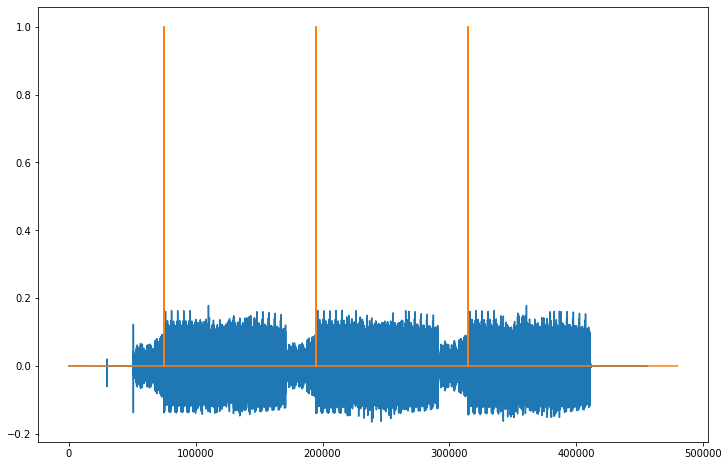

In [9]:
zeros = rx.chirp_method(r)
plt.plot(r)
plt.plot(zeros)

[ -1.56723134e-05  -1.50367843e-05  -1.52838547e-05]


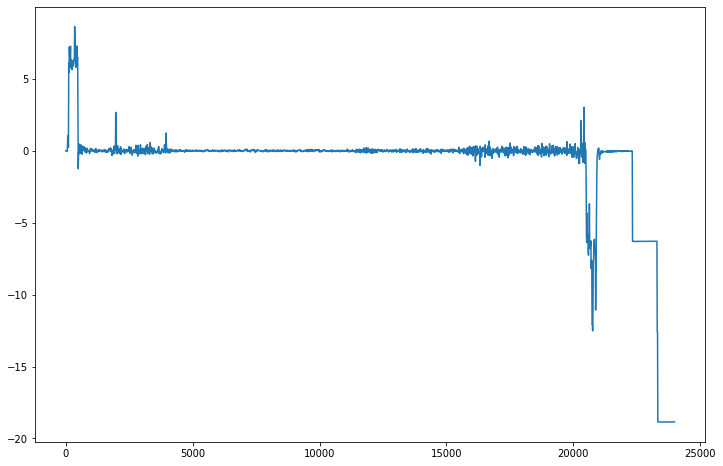

In [10]:
rx_signal_cp = rx.get_symbols(r,zeros)
rx_signal = rx.remove_cp(rx_signal_cp)
OFDM_symbols = np.fft.fft(rx_signal)
data_symbols, start_pilots, end_pilots = rx.get_data(OFDM_symbols)
data_symbols, Hest_start, Hest_end = rx.equalise(data_symbols, start_pilots, end_pilots)
s = np.unwrap(np.angle(Hest_start))
e = np.unwrap(np.angle(Hest_end))
diff = e - s
#diff = diff[:,200:-700]
x = np.linspace(0,rx.K/rx.ofdm_symbol_size*rx.fs,len(diff[0]))
plt.plot(x,diff[0])

In [11]:
grad = np.polyfit(x,diff[0],1)
grad[0]

-0.00023626718408730906

------------------------------------------
Receive 
------------------------------------------
OFDM Paramters:
Number of actual Sub Carriers:      2047 
Cyclic prefix length:               704 
Modulation method:                  QPSK 
Sync Method:                        chirp 
Packet Length:                      10
Number of received OFDM symbols:    30
[ -1.56723134e-05  -1.50367843e-05  -1.52838547e-05]
Number of received bits:            122820


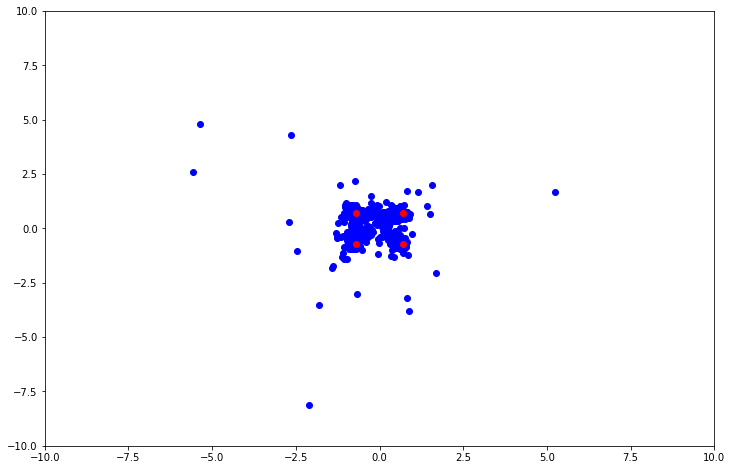

In [12]:
rx_bits, Hstart, Hend = rx.receive(r, graph_output=True)

In [13]:
errs = np.sum(abs(bits-rx_bits[:len(bits)]))
errs/len(bits)

0.079872984855886661